# Lab 2: CSS 100

In this lab, you'll get hands-on practice using some of the `nltk` library and its various applications.

In [25]:
### Make sure to run this code!
import nltk
import pandas as pd
import seaborn as sns

nltk.download("punkt")
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/grader-
[nltk_data]     css100-02/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/grader-
[nltk_data]     css100-02/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/grader-
[nltk_data]     css100-02/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Part 1. Text processing.

### Q1. Tokenizing sentences with `nltk`

To start off, let's tokenize a few different *paragraphs* of text. Below is a list of paragraphs. Use a `list` comprehension to `sent_tokenize` each of them, and call the resulting `list` of tokens `tokenized_paragraphs`.

Don't forget to `import` the `sent_tokenize` function!

In [7]:
paragraphs = [
    "The movie wasn't great but it also wasn't terrible. Overall I think I liked it.",
    "I really like iced coffee. However, iced tea is my favorite!",
    "The filibuster has led to a bottleneck in Congress. It's hard to pass bills these days.",
    "I liked the meal but thought the service was even better! Very professionanl."
]

In [8]:
### BEGIN SOLUTION
from nltk import sent_tokenize

tokenized_paragraphs = [sent_tokenize(i) for i in paragraphs]
### END SOLUTION

In [9]:
assert tokenized_paragraphs

assert len(tokenized_paragraphs) == 4
assert len(tokenized_paragraphs[0]) == 2
assert len(tokenized_paragraphs[1]) == 2
assert len(tokenized_paragraphs[2]) == 2
assert len(tokenized_paragraphs[3]) == 2


### Q2. Tokenizing words with `nltk`

Now let's tokenize those sentences into *words*. For each sentence in each paragraph in `tokenized_paragraphs`, call `word_tokenize`. You might want to use a **nested list comprehension**:

```python
[[func(i) for i in sublist] for sublist in original_list]
```

Call the result `tokenized_sentences`.

Don't forget to `import` the `word_tokenize` function!

In [10]:
### BEGIN SOLUTION
from nltk import word_tokenize

tokenized_sentences = [[word_tokenize(sentence) for sentence in sublist] for sublist in tokenized_paragraphs]
### END SOLUTION

In [11]:
assert tokenized_sentences

assert len(tokenized_sentences) == 4
assert len(tokenized_sentences[0][0]) == 12
assert len(tokenized_sentences[0][1]) == 7
assert len(tokenized_sentences[1][0]) == 6
assert len(tokenized_sentences[1][1]) == 8

### Q3. Lemmatizing and *stemming* words

Now you'll get some practice *lemmatizing* and *stemming* words. 

- Import `WordNetLemmatizer` and `PorterStemmer`, and apply them to `sentence`. 
- Call the resulting lists of tokens `lemmas` and `stems`, respectively.
- Then, create a *new* list called `diff`, which includes all the lemmas from `lemmas` that were *different* from the corresponding `stem`.

```python
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
```

Don't forget to `word_tokenize` first!

In [12]:
sentence = "those are my favorite movies from the last two years"

In [13]:
### BEGIN SOLUTION
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

stems = [ps.stem(i) for i in word_tokenize(sentence)]
lemmas = [lemmatizer.lemmatize(i) for i in word_tokenize(sentence)]

diff = [i for i in lemmas if i not in stems]

### END SOLUTION

In [14]:
assert stems
assert lemmas

assert len(stems) == 10
assert len(lemmas) == 10

In [15]:
assert diff

assert len(diff) == 2

### Q4. More fine-grained lemmatization

`WordNetLemmatizer` can accept a `pos` argument (e.g., 'n' or 'a'). Try running the lemmatizer on the list of `adjectives` below and save the results, using either the `pos` argument or not. Save the results in two different lists: `with_pos` and `without_pos`.

**Note**: Set `pos = "a"` for adjectives, if using `pos`.

In [16]:
adjectives = ["good", "greatest", "best", "worst", "unhappiest", "happiest", "better"]

In [17]:
### BEGIN SOLUTION
lemmatizer = WordNetLemmatizer()

with_pos = [lemmatizer.lemmatize(i, pos = "a") for i in adjectives]
without_pos = [lemmatizer.lemmatize(i) for i in adjectives]

### END SOLUTION

In [18]:
assert with_pos
assert without_pos

assert "great" in with_pos
assert "bad" in with_pos
assert "greatest" in without_pos
assert "worst" in without_pos

## Part 2. Sentiment analysis.

### Q5. Use the `SentimentIntensityAnalyzer` to analyze restaurant reviews

1. Read in `data/restaurant_reviews.csv` using `pandas` (call it `df_reviews`).  
2. Then, use the `SentimentIntensityAnalyzer` to analyze the sentiment of each review. 
3. Create a new column called `vader_sentiment`, which is set equal to the result of the "compound" score from the `SentimentIntensityAnalyzer.polarity_scores`.

Don't forget to import `SentimentIntensityAnalyzer`!

**Reflection (for thought)**: Does the measured sentiment relate to `Liked == 0/1`?

In [19]:
### BEGIN SOLUTION
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_reviews = pd.read_csv("data/restaurant_reviews.csv")

df_reviews['vader_sentiment'] = df_reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
### END SOLUTION

In [20]:
assert len(df_reviews) == 1000

assert 'vader_sentiment' in df_reviews.columns

In [21]:
assert df_reviews['vader_sentiment'].mean() > 0
assert df_reviews['vader_sentiment'].median() > 0

df_grouped = df_reviews.groupby("Liked").mean('vader_sentiment')
assert df_grouped['vader_sentiment'][0] < 0
assert df_grouped['vader_sentiment'][1] > 0

### Q6. Create a graph

Finally, create a *visualization* comparing `vader_sentiment` to `Liked`. Does this show what you expected?

(Note: a bar plot, boxplot, violinplot, etc., or any other plot with a categorical x-axis would be fine here.)

<AxesSubplot:xlabel='Liked', ylabel='vader_sentiment'>

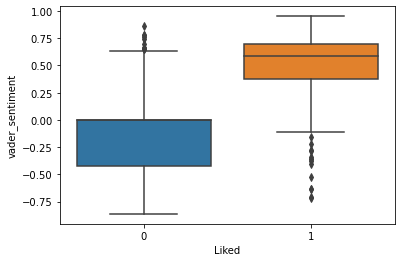

In [27]:
### BEGIN SOLUTION
sns.boxplot(data = df_reviews, x = "Liked", y = "vader_sentiment")
### END SOLUTION

## Submit!

Congratulations, you're done with lab 2 and now have some basic fluency with `nltk`!